In [1]:
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [2]:
#Import data
#Remove special characters and non english characters from dataset
#Create dataframe using dataset
#View data using groupby

data = pd.read_csv('Desktop/TJ_Dataset.csv', header=0)

data = data.replace(['^Albumin .*$'], ['Albumin '], regex=True)
data = data.replace(['^Alkaline Phosphatase .*$'], ['Alkaline Phosphatase '], regex=True)
data = data.replace(['^Alpha Feto\- Protein.*$'], ['Alpha Feto- Protein'], regex=True)
data = data.replace(['^Basophils.*$'], ['Basophils'], regex=True)
data = data.replace(['^Calcium .*$'], ['Calcium '], regex=True)
data = data.replace(['^Carcino\-embryonic Antigen.*$'], ['Carcino-embryonic Antigen'], regex=True)
data = data.replace(['^Chloride .*$'], ['Chloride '], regex=True)
data = data.replace(['^Creatinine.*$'], ['Creatinine'], regex=True)
data = data.replace(['^Direct Bilirubin  .*$'], ['Direct Bilirubin  '], regex=True)
data = data.replace(['^Eosinophils.*$'], ['Eosinophils'], regex=True)
data = data.replace(['^Gamma Glutamyltransferase .*$'], ['Gamma Glutamyltransferase '], regex=True)
data = data.replace(['^Globulin .*$'], ['Globulin '], regex=True)
data = data.replace(['^Glucose .*$'], ['Glucose '], regex=True)
data = data.replace(['^HbA1c .*$'], ['HbA1c '], regex=True)
data = data.replace(['^HDL Cholesterol .*$'], ['HDL Cholesterol '], regex=True)
data = data.replace(['^Hepatitis A Antibodies.*$'], ['Hepatitis A Antibodies'], regex=True)
data = data.replace(['^Hepatitis Bs Antibodies.*$'], ['Hepatitis Bs Antibodies'], regex=True)
data = data.replace(['^Inorganic Phosphate .*$'], ['Inorganic Phosphate '], regex=True)
data = data.replace(['^LDL Cholesterol .*$'], ['LDL Cholesterol '], regex=True)
data = data.replace(['^Potassium .*$'], ['Potassium '], regex=True)
data = data.replace(['^Sodium .*$'], ['Sodium '], regex=True)
data = data.replace(['^T.Chol/HDL Cholesterol Ratio .*$'], ['T.Chol/HDL Cholesterol Ratio '], regex=True)
data = data.replace(['^Total Cholesterol .*$'], ['Total Cholesterol '], regex=True)
data = data.replace(['^Total Protein .*$'], ['Total Protein '], regex=True)
data = data.replace(['^Triglycerides .*$'], ['Triglycerides '], regex=True)
data = data.replace(['^Urea .*$'], ['Urea '], regex=True)
data = data.replace(['^Uric Acid .*$'], ['Uric Acid '], regex=True)
data = data.replace(['^Urine PH.*$'], ['Urine PH'], regex=True)
data = data.replace(['^Urine specific gravity.*$'], ['Urine specific gravity'], regex=True)
data = data.replace(['^e GFR.*$'], ['e GFR'], regex=True)

df = pd.DataFrame({'CID': data['Clinic ID'],'ID': data['Unique_Identifier'], 'Gender': data['Gender'], 'Nationality': data['Nationality'], 'Test_Date': data['Test_Date'], 'Profile_Name': data['Profile_Name'],'Age': data['Age'],'Score': data['Score'],'Conclusion': data['Conclusion'],'Score_Level': data['Score_Level'],'Name': data['Name'], 'T1': data['Threshold_1'],'T2': data['Threshold_2'],'SI_Conversion': data['SI_Conversion']})
df.groupby(['CID','ID', 'Gender', 'Age', 'Nationality', 'Test_Date', 'Profile_Name', 'Score_Level', 'Score', 'T1', 'T2', 'SI_Conversion', 'Name']).count().unstack(fill_value=0)

Conclusion  \
Name                                                                                                                              Albumin    
CID ID                               Gender Age Nationality Test_Date Profile_Name Score_Level Score  T1    T2    SI_Conversion              
11  003d25e3fac5a1d2aa4ba502ffb77b5b F      67  SINGAPOREAN 24/05/17  LIFE1        0           0.00   0.0   0.0   1.0000                 0   
                                                                                                      60.0  0.0   1.0000                 0   
                                                                                   1           0.50   0.0   1.0   1.0000                 0   
                                                                                               0.80   0.5   1.3   1.0000                 0   
                                                                                               2.95   4.4   0.0   1.0000                 0   
                                                                                               3.20   2.0   3.7   1.0000                 0   
                                                                                               3.40   2.3   4.7   1.0000                 0   
                                                                                               3.50   3.3   5.1   1.0000                 0   
                                                                                               4.10   2.4   5.7   1.0000                 0   
                                                                                               4.70   3.7   5.1   1.0000                 1   
                                                                                               5.60   0.0   6.0   1.0000                 0   
                                                                                               6.60   4.0   10.0  1.0000                 0   
                                                                                               7.90   6.2   8.2   1.0000                 0   
                                                                                               9.50   8.4   10.4  1.0000                 0   
                                                                                               9.90   2.0   10.0  1.0000                 0   
                                                                                               16.00  8.0   40.0  1.0000                 0   
                                                                                               22.00  22.0  0.0   1.0000                 0   
                                                                                               31.00  27.0  32.0  1.0000                 0   
                                                                                               32.00  10.0  46.0  1.0000                 0   
                                                                                               34.00  32.0  36.0  1.0000                 0   
                                                                                               36.00  15.0  41.0  1.0000                 0   
                                                                                               38.00  38.0  52.0  1.0000                 0   
                                                                                               40.00  36.0  120.0 1.0000                 0   
                                                                                               48.00  40.0  75.0  1.0000                 0   
                                                                                               57.00  38.0  0.0   38.6698                0   
                                                                                               92.00  130.0 0.0   38.6698                0   
          

In [3]:
#Classify Variable to 2 outputs
df.loc[df.Conclusion == 'Desirable', 'Conclusion'] = 'Desirable'
df.loc[df.Conclusion != 'Desirable', 'Conclusion'] = 'Not Desirable'

In [4]:
#Convert Variable to numerical output
textReplace = {'Desirable': 0, 'Not Desirable': 1, 'High': 1, 'Not High': 0, 'Low': 1, 'Not Low': 0}
df.Conclusion =[textReplace[i] for i in df.Conclusion]

In [5]:
#View Shape of dataframe
df.shape

(23427, 14)

In [6]:
#View first 5 rows of dataframe
df.head()

,CID,ID,Gender,Nationality,Test_Date,Profile_Name,Age,Score,Conclusion,Score_Level,Name,T1,T2,SI_Conversion
0,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,16/01/16,"LIFE3 MALE,FPSAP",59,4.4,0,1,Albumin,3.7,5.1,1.0
1,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,10/01/17,LIFE3 MALE,60,4.5,0,1,Albumin,3.7,5.1,1.0
2,11,b2fa0f5835ef1847636d5720fc9f30c9,F,SINGAPOREAN,09/07/16,"LIFE2,HBA1CP",83,4.2,0,1,Albumin,3.7,5.1,1.0
3,11,3f663f8eadfcf405cb7bdb6bf7e14d1a,F,SINGAPOREAN,07/03/17,LIFE1,76,4.0,0,1,Albumin,3.7,5.1,1.0
4,11,f57a87f0625c6b3e44ce79af78b34f60,F,SINGAPOREAN,07/01/16,LIFE2,58,4.3,0,1,Albumin,3.7,5.1,1.0


In [7]:
#View Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23427 entries, 0 to 23426
Data columns (total 14 columns):
CID              23427 non-null int64
ID               23427 non-null object
Gender           23427 non-null object
Nationality      23427 non-null object
Test_Date        23427 non-null object
Profile_Name     23427 non-null object
Age              23427 non-null int64
Score            23427 non-null float64
Conclusion       23427 non-null int64
Score_Level      23427 non-null int64
Name             23427 non-null object
T1               23427 non-null float64
T2               23427 non-null float64
SI_Conversion    23427 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 2.0+ MB


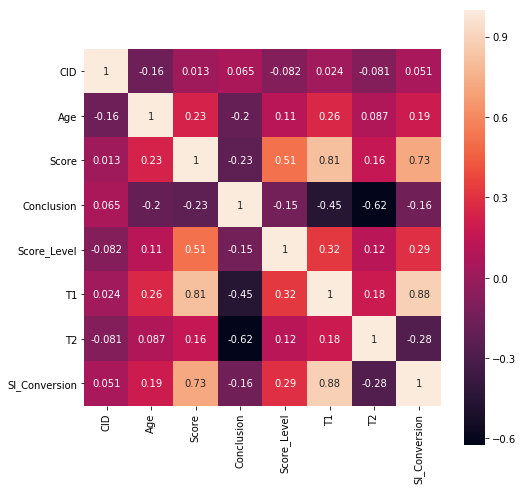

In [8]:
#select relevant columns and store in new dataframe
#View correlation of each column towards one another
#Visualize correlation in heatmap
df1 = df[['CID', 'ID', 'Test_Date', 'Age', 'Name', 'Score','Conclusion', 'Score_Level', 
          'T1','T2', 'SI_Conversion']] #Subsetting the data
cor = df1.groupby(['ID', 'Test_Date']).mean().corr() #Calculate the correlation of the above variables
fig, ax = plt.subplots(figsize=(8,8))   
sns.heatmap(cor, square = True, annot = True, ax=ax) #Plot the correlation as heat map

In [9]:
#Scale the dataframe to fit the culster
ss = StandardScaler()
ss.fit_transform(df1.groupby(['ID', 'Test_Date','Name']).mean().unstack(fill_value=0))

array([[ 0.84641065,  0.78286417, -0.65548695, ..., -0.73940495,
        -0.73940495,  0.90429918],
       [-1.05729036, -1.13354073, -0.65548695, ..., -0.73940495,
        -0.73940495, -1.10582871],
       [ 0.84641065,  0.78286417, -0.65548695, ..., -0.73940495,
        -0.73940495,  0.90429918],
       ...,
       [ 1.19253811,  1.13130142, -0.65548695, ..., -0.73940495,
        -0.73940495,  0.90429918],
       [ 0.84641065,  0.78286417, -0.65548695, ...,  1.35243887,
         1.35243887,  0.90429918],
       [ 0.84641065,  0.78286417,  1.4353283 , ...,  1.35243887,
         1.35243887,  0.90429918]])

In [10]:
#Kmeans Clustering

In [11]:
#View dataframe
df1.groupby(['ID', 'Test_Date', 'Name']).mean().unstack()

CID                        \
Name                                       Albumin  Alkaline Phosphatase    
ID                               Test_Date                                  
003d25e3fac5a1d2aa4ba502ffb77b5b 24/05/17      11.0                  11.0   
0079e1b73a94ba341f53ca22c6910782 08/06/16       NaN                   NaN   
                                 14/01/16      11.0                  11.0   
                                 18/10/16       NaN                   NaN   
00d64d073ff05912189aa31bf8ce5d17 24/07/17       NaN                   NaN   
00f3ce1c7437a60280aa0268e74550ef 09/09/17      13.0                  13.0   
                                 16/10/16      11.0                  11.0   
                                 18/09/17       NaN                   NaN   
020971cfb58c7bc5efaf56eac237eeef 09/11/16      11.0                  11.0   
021ded5c60a28a425a50a8a580f5a0a1 11/11/17      13.0                  13.0   
02ae9d11341d75b3fa1116a73f98fab3 20/01/17       NaN                   NaN   
02b0c4f80eb74c541b4fe168f996cd34 30/03/17       NaN                   NaN   
03664e3f947017c10b3cd34fa4f9e614 23/12/16       NaN                   NaN   
0379b4fa0479b392b77348e7527c75a6 25/10/16      11.0                  11.0   
03d53add755405ef80fbca611dc779c0 24/03/16      11.0                  11.0   
0483886f6a9dc55af4c98265f603b1c1 05/05/17      13.0                  13.0   
                                 09/03/17       NaN                   NaN   
054581ea7e73e95d28c0f994f2338e40 30/01/16      11.0                  11.0   
058dd83e3886356f6ae93bc7097ac321 13/02/16      11.0                  11.0   
064986a009327172e10e95e45fb5b307 27/01/16      11.0                  11.0   
06c1c505d703cd44cf6c82928b412d9f 15/04/17      11.0                  11.0   
                                 19/04/16      11.0                  11.0   
08c31ec9e0901ed3ea26bd1d443bebbf 07/02/17      11.0                  11.0   
08d4bf28bc1c6987e4fb77e523266dbf 27/04/16      11.0                  11.0   
                                 31/10/17      11.0                  11.0   
09c3ec22be1ceefa695f48c57efb6075 07/03/17       NaN                   NaN   
0a1415cf7d588c17201119b9b8749731 02/05/17       NaN                   NaN   
                                 23/04/17      11.0                  11.0   
0a49b8e857b46b878e6ccef2e88f105e 12/05/16      11.0                  11.0   
0a8d3e5e56480de2fc52d44fa54842bf 29/04/17      11.0                  11.0   
...                                             ...                   ...   
f7cef792ad41ca6b6c54a81686ef995e 19/10/17       NaN                   NaN   
                                 20/05/17       NaN                   NaN   
f82ce349635ceac897fe71e1411f2532 01/02/17      11.0                  11.0   
f8def81f902f91b6fe5c4ccdda64c527 10/06/17      11.0                  11.0   
                                 17/03/16      11.0                  11.0   
f932b267061312942db6f8a529c81461 12/08/17      11.0                  11.0   
f946f5a4b447611c1e166fc688f5c798 20/04/17      11.0                  11.0   
f9acf703bd4b2a647c1325e30ddef4c5 02/12/17      11.0                  11.0   
fa6da6b59db08f44fa597c9fc998c74d 06/05/17       NaN                   NaN   
fa8192bfb97978f946ce7825ff28ca68 21/07/17      11.0                  11.0   
fa851616698eabbb209ce46c3783f6e8 30/12/17      13.0                  13.0   
fae0c56f9b4cce0ca15b16b84fc2dd06 25/01/17      11.0                  11.0   
fafa59bad1b0ba7b7372a6c6306568da 11/04/16      11.0                  11.0   
fc159d50ea37aa58e23ea7e897132d6e 23/09/16      11.0                  11.0   
fdd1e5b67ee4189e9483a50a40c6294c 01/10/16       NaN                   NaN   
                                 11/07/16       NaN                   NaN   
                                 28/06/16      11.0                  11.0   
fe398518f9fc55a6aa4d0fbe8858905b 04/07/16       NaN                   NaN   
                                 11/07/16   

In [12]:
#Fit encoded dataset into smote algorithm
#Use Smore algorithm to generate synthetic data
#Training and Test Set Ratio: .3 to .7
#Convert oversampled data to dataframe object
#Check oversampling results and data proportion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

df_code = pd.get_dummies(df1)
training_features, test_features, \
training_target, test_target, = train_test_split(df_code.drop(['Conclusion'], axis=1),
                                               df_code['Conclusion'],
                                               test_size = .3,
                                               random_state=0)

x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .3,
                                                  random_state=0)
sm = SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
x_train_res = pd.DataFrame(data=x_train_res,columns=x_train.columns )
y_train_res = pd.DataFrame(data=y_train_res,columns=['Conclusion'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(x_train_res))
print("Number of not desirable conclusions in oversampled data",len(y_train_res[y_train_res['Conclusion']==0]))
print("Number of desirable conclusions in oversampled data",len(y_train_res[y_train_res['Conclusion']==1]))
print("Proportion of not desirable conclusions in oversampled data is ",len(y_train_res[y_train_res['Conclusion']==0])/len(x_train_res))
print("Proportion of desirable conclusions in oversampled data is ",len(y_train_res[y_train_res['Conclusion']==1])/len(x_train_res))

length of oversampled data is  13320
Number of not desirable conclusions in oversampled data 6660
Number of desirable conclusions in oversampled data 6660
Proportion of not desirable conclusions in oversampled data is  0.5
Proportion of desirable conclusions in oversampled data is  0.5


In [13]:
#View dataframe after oversampling
x_train_res

,CID,Age,Score,Score_Level,T1,T2,SI_Conversion,ID_003d25e3fac5a1d2aa4ba502ffb77b5b,ID_0079e1b73a94ba341f53ca22c6910782,ID_00d64d073ff05912189aa31bf8ce5d17,...,Name_Urine Micro organism,Name_Urine Nitrite,Name_Urine PH,Name_Urine Protein,Name_Urine Red Blood Cell,Name_Urine Urobilinogen,Name_Urine White Blood cell,Name_Urine specific gravity,Name_Urine white blood cell,Name_e GFR
0,11.000000,44.000000,16.000000,1.0,10.000000,46.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,13.000000,47.000000,1.025000,1.0,1.001000,1.0350,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0
2,11.000000,43.000000,3.600000,2.0,3.700000,5.1000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,11.000000,61.000000,0.600000,1.0,0.000000,1.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,13.000000,42.000000,3.400000,1.0,2.000000,3.7000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
5,13.000000,37.000000,27.000000,1.0,27.000000,32.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
6,11.000000,77.000000,32.000000,1.0,32.000000,36.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
7,11.000000,42.000000,3.100000,1.0,2.000000,3.7000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
8,11.000000,37.000000,79.000000,2.0,3.900000,6.2000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
9,11.000000,80.000000,5.500000,1.0,4.000000,10.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [14]:
#View dataframe after oversampling
y_train_res

,Conclusion
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [15]:
#Add categorical variables to dataframe to allow grouping of dataframe
x_train_res['Test_Date'] = df1['Test_Date']
x_train_res['ID'] = df1['ID']
x_train_res['Name'] = df1['Name']

In [16]:
#Add categorical variables to dataframe to allow grouping of dataframe
y_train_res['Test_Date'] = df1['Test_Date']
y_train_res['ID'] = df1['ID']
y_train_res['Age'] = df1['Age']
y_train_res['Name'] = df1['Name']

In [17]:
#View columns of adjutsed dataframe
x_train_res.columns

Index(['CID', 'Age', 'Score', 'Score_Level', 'T1', 'T2', 'SI_Conversion',
       'ID_003d25e3fac5a1d2aa4ba502ffb77b5b',
       'ID_0079e1b73a94ba341f53ca22c6910782',
       'ID_00d64d073ff05912189aa31bf8ce5d17',
       ...
       'Name_Urine Protein', 'Name_Urine Red Blood Cell',
       'Name_Urine Urobilinogen', 'Name_Urine White Blood cell',
       'Name_Urine specific gravity', 'Name_Urine white blood cell',
       'Name_e GFR', 'Test_Date', 'ID', 'Name'],
      dtype='object', length=1091)

In [18]:
#Select relevant columns and insert into new dataframe
x_train1 = x_train_res[['ID', 'Age', 'Test_Date', 'Name', 'Score', 'Score_Level', 'T1', 'T2', 'SI_Conversion']]
x_train1

,ID,Age,Test_Date,Name,Score,Score_Level,T1,T2,SI_Conversion
0,cb1d683b1f24f3c494138f6cbaf2ce4c,44.000000,16/01/16,Albumin,16.000000,1.0,10.000000,46.0000,1.0000
1,cb1d683b1f24f3c494138f6cbaf2ce4c,47.000000,10/01/17,Albumin,1.025000,1.0,1.001000,1.0350,1.0000
2,b2fa0f5835ef1847636d5720fc9f30c9,43.000000,09/07/16,Albumin,3.600000,2.0,3.700000,5.1000,1.0000
3,3f663f8eadfcf405cb7bdb6bf7e14d1a,61.000000,07/03/17,Albumin,0.600000,1.0,0.000000,1.0000,1.0000
4,f57a87f0625c6b3e44ce79af78b34f60,42.000000,07/01/16,Albumin,3.400000,1.0,2.000000,3.7000,1.0000
5,f57a87f0625c6b3e44ce79af78b34f60,37.000000,06/06/17,Albumin,27.000000,1.0,27.000000,32.0000,1.0000
6,753f1dffc933b14124ba5971430e0dcc,77.000000,11/01/16,Albumin,32.000000,1.0,32.000000,36.0000,1.0000
7,753f1dffc933b14124ba5971430e0dcc,42.000000,17/12/16,Albumin,3.100000,1.0,2.000000,3.7000,1.0000
8,0079e1b73a94ba341f53ca22c6910782,37.000000,14/01/16,Albumin,79.000000,2.0,3.900000,6.2000,1.0000
9,ab3e7156a3d9af00b20c7fd97a318bf6,80.000000,07/03/17,Albumin,5.500000,1.0,4.000000,10.0000,1.0000


In [19]:
#Implement Kmeans
#Create a new column in existing dataframe to store the cluster results
#View Clustering efficieny Score
from sklearn import metrics
def doKmeans(X, nclust=4):
    model = KMeans(nclust, random_state=66)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    print(metrics.silhouette_score(X, clust_labels, metric='euclidean'))
    x = model.fit_predict(x_train1.groupby(['ID', 'Test_Date', 'Name']).mean())
    return (clust_labels, cent, x)
    
clust_labels, cent, x = doKmeans(x_train1.groupby(['ID', 'Test_Date', 'Name']).mean().unstack(fill_value=0), 4)
kmeans = pd.DataFrame(clust_labels)
print(clust_labels)
x_train1['kmeans']= x

0.15765262379436312
[0 1 3 1 0 3 3 3 1 3 1 3 0 0 1 0 0 3 3 0 0 3 0 1 0 3 3 3 3 0 3 3 3 0 1 3 1
 1 1 1 3 3 0 3 3 1 3 1 0 1 1 1 1 1 1 1 1 1 3 3 0 3 1 1 0 1 1 1 1 0 3 1 3 1
 0 1 1 0 1 1 1 1 1 0 1 1 3 0 3 3 1 1 3 1 1 1 1 1 1 3 1 2 1 3 1 3 3 1 1 3 1
 1 1 1 1 2 3 3 0 3 0 1 3 3 1 3 1 0 3 1 1 1 0 1 0 3 3 1 2 1 1 0 0 1 3 3 3 1
 1 1 3 0 1 0 1 1 1 3 3 0 1 1 1 1 3 0 1 1 0 0 3 0 1 1 1 0 3 2 0 1 3 1 0 1 1
 3 3 1 0 3 1 3 1 1 1 3 3 1 1 1 3 3 1 1 1 3 3 3 0 3 3 1 1 3 1 0 3 3 0 1 3 3
 1 1 0 3 2 3 1 3 1 2 1 1 3 3 3 1 0 3 3 3 0 1 0 3 1 1 0 1 3 1 3 3 0 1 1 1 3
 1 1 3 1 1 3 1 3 3 0 3 3 0 0 3 0 3 3 1 3 1 0 3 3 3 3 1 0 1 3 1 3 0 3 1 0 3
 2 0 0 3 3 3 1 3 3 0 1 3 1 0 1 1 1 3 1 0 3 3 3 0 3 3 1 1 1 0 1 3 1 1 1 2 1
 0 3 1 1 1 1 1 1 1 1 1 3 2 1 1 3 1 1 3 3 1 3 3 3 3 2 1 1 0 0 1 3 3 0 1 1 1
 3 0 0 3 1 1 3 1 1 0 3 1 3 0 1 1 0 3 3 3 3 2 3 3 0 1 3 3 0 0 1 3 1 1 1 1 1
 3 1 1 1 1 0 1 3 3 1 1 1 2 3 3 0 3 1 3 3 0 1 3 3 3 3 0 1 3 3 3 0 3 1 1 3 3
 1 3 0 1 1 0 3 1 0 0 3 1 1 1 3 1 3 3 3 3 0 1 3 0 0 1 1 1 1 1 1 3 2 3 3 3 1
 1 1 

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



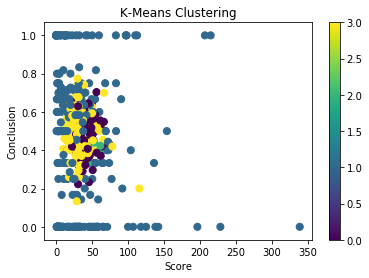

In [20]:
#Plot cluster distribution using scatterplot
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x_train1.groupby(['ID', 'Test_Date']).mean()['Score'],y_train_res.groupby(['ID', 'Test_Date']).mean()['Conclusion'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Score')
ax.set_ylabel('Conclusion')
plt.colorbar(scatter)

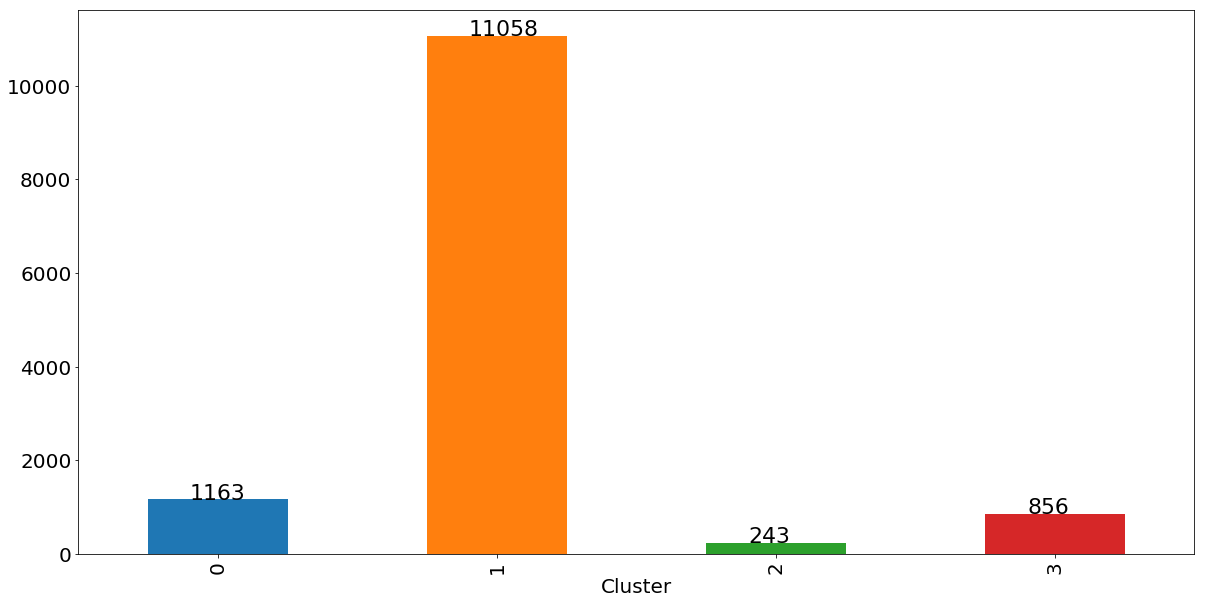

In [21]:
#View number of records in each cluster
ax = x_train1.groupby(['kmeans']).count()['Score'].plot(figsize=(20,10),kind='bar',fontsize=20)
plt.xlabel('Cluster', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.15, i.get_height()+2, \
            str(round(i.get_height(), 2)), fontsize=22,
                color='black')

In [22]:
#Sort Dataframe by Cluster
x_train1.groupby(['ID', 'Test_Date', 'Name']).mean().unstack(fill_value=0)
df2= x_train1.sort_values(['kmeans'])
df2

,ID,Age,Test_Date,Name,Score,Score_Level,T1,T2,SI_Conversion,kmeans
6081,9cfc43338a9189aabc228530a993d759,56.000000,19/02/16,Glucose,0.000000,0.0,0.000,0.0000,1.0000,0
933,9d7106e0af82d68a71612badf8281e78,35.000000,09/07/16,Alpha Feto- Protein,0.000000,0.0,0.000,0.0000,1.0000,0
7460,2f4c60f207095b584802f926afa2bfa6,55.000000,17/05/17,Haemoglobin,0.000000,0.0,0.000,0.0000,1.0000,0
12396,e404d336f7bd990d4f574632f2def6e1,57.214409,21/06/17,Monocytes,12.196896,2.0,0.777,1.7871,1.0000,0
11598,750ff9832a74191b72ea976516d94172,52.571983,07/06/16,MCV,221.523994,2.0,200.000,0.0000,38.6698,0
2470,d5b2b753466e48caeb3a4b895b58d6af,37.000000,26/08/17,Chloride,0.000000,0.0,0.000,0.0000,1.0000,0
927,8d81b4b4f2302de3dddc032cb7442dca,77.000000,29/06/16,Alpha Feto- Protein,0.000000,0.0,0.000,0.0000,1.0000,0
7456,c0ef4090cbd99c52a21325fe1915e024,80.000000,11/05/17,Haemoglobin,46.000000,1.0,36.000,120.0000,1.0000,0
934,9d7106e0af82d68a71612badf8281e78,51.000000,08/07/17,Alpha Feto- Protein,93.000000,1.0,76.000,96.0000,1.0000,0
12401,a4bfaa1b87330b09294e80cb042508f6,78.477014,03/07/17,Monocytes,180.754324,2.0,130.000,0.0000,38.6698,0


In [23]:
#View how efficient a independent variable is in predicting a dependent variable
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(x_train1.groupby(['ID', 'Age', 'Test_Date', 'Name']).mean()['Score'],y_train_res.groupby(['ID', 'Age', 'Test_Date', 'Name']).mean()['Conclusion'])

0.00039657847140219074

In [24]:
#View how efficient a independent variable is in predicting a dependent variable
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(x_train1.groupby(['ID', 'Age', 'Test_Date', 'Name']).mean()['T1'],y_train_res.groupby(['ID', 'Age', 'Test_Date', 'Name']).mean()['Conclusion'])

0.00032682221709568946

In [25]:
#View how efficient a independent variable is in predicting a dependent variable
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(x_train1.groupby(['ID', 'Age', 'Test_Date', 'Name']).mean()['T2'],y_train_res.groupby(['ID', 'Age', 'Test_Date', 'Name']).mean()['Conclusion'])

0.0002720834251894381

In [26]:
#View how efficient a independent variable is in predicting a dependent variable
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(x_train1.groupby(['ID', 'Age', 'Test_Date', 'Name']).mean()['SI_Conversion'],y_train_res.groupby(['ID', 'Age', 'Test_Date', 'Name']).mean()['Conclusion'])

-1.721260239769989e-05

In [27]:
#Export final dataframe as csv for further study if needed
df2.to_csv('KMeans_Cluster.csv', sep='\t', encoding='utf-8', index = False)

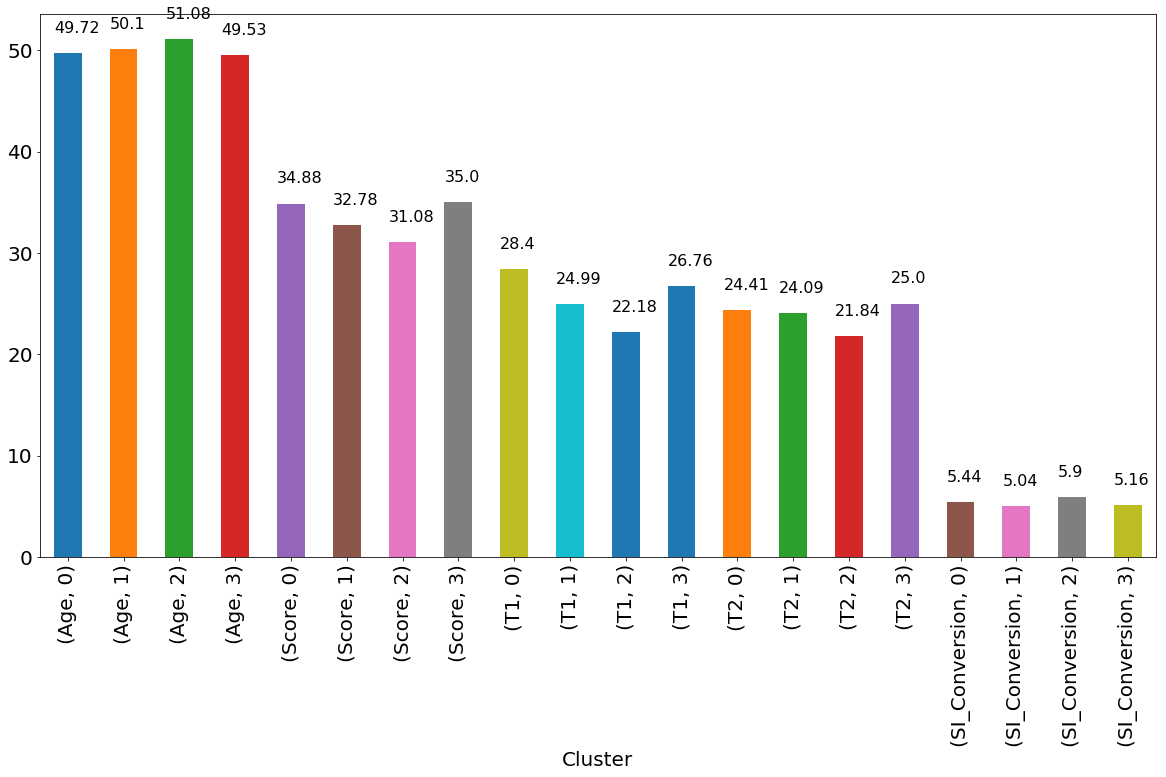

In [28]:
#Plot dataframe grouped by cluster showing mean value of each column in each cluster
#Identify the most significant feature of each column in each cluster
df2 = x_train1[['Age', 'Score', 
          'T1','T2', 'SI_Conversion', 'kmeans']]
ax = df2.groupby('kmeans').mean().unstack().plot(figsize=(20,10),kind='bar',fontsize=20)
plt.xlabel('Cluster', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2, \
            str(round(i.get_height(), 2)), fontsize=16,
                color='black')

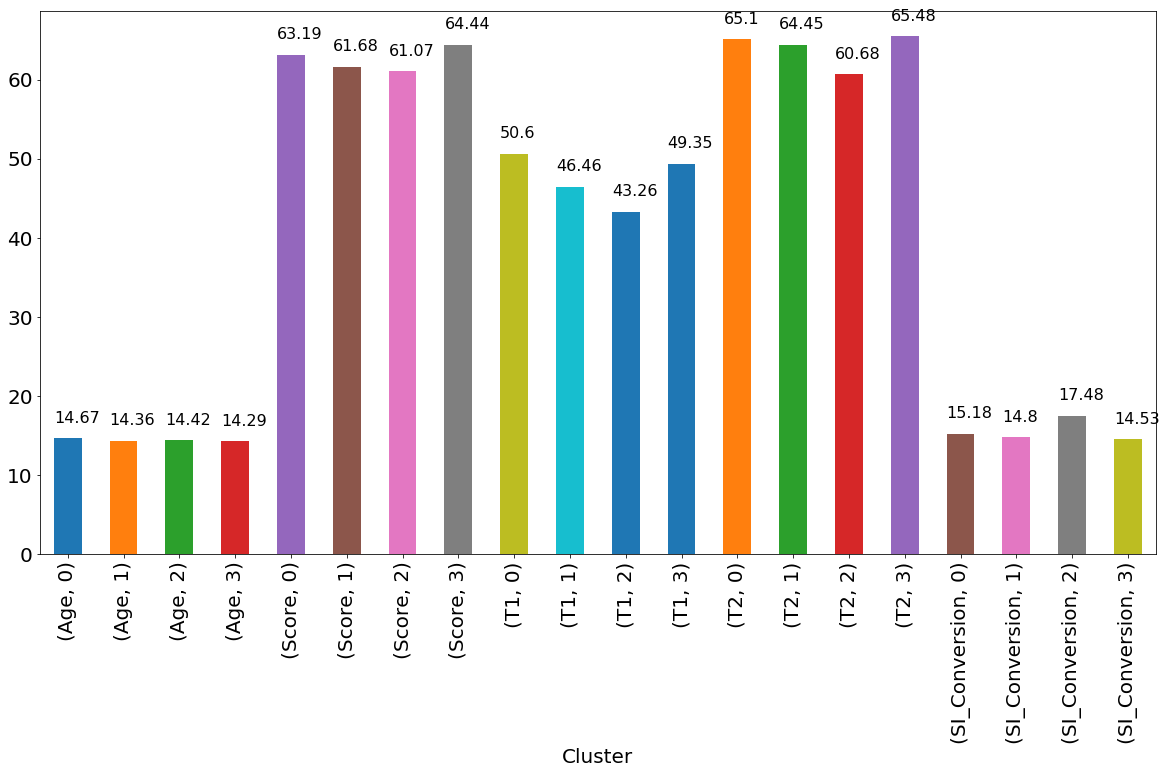

In [29]:
#Plot dataframe grouped by cluster showing standard deviation value of each column in each cluster
#Identify the most significant feature of each column in each cluster
df2 = x_train1[['Age', 'Score', 
          'T1','T2', 'SI_Conversion', 'kmeans']]
ax = df2.groupby(['kmeans']).std().unstack().plot(figsize=(20,10),kind='bar',fontsize=20)
plt.xlabel('Cluster', fontsize=20);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2, \
            str(round(i.get_height(), 2)), fontsize=16,
                color='black')